# Imports
---

In [20]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import Dataset
---
**Column Description (Data Source: [Smoking and Drinking Dataset with body signal on Kaggle](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data))**

- Sex - male, female
- Age - round up to 5 year
- Height - round up to 5 cm[cm]
- Weight [kg]
- Waistline
- Sight_left - eyesight(left) the column shows how well the left eye sees, where perfect vision = 1.0
- Sight_right - eyesight(right) the column shows how well the right eye sees where perfect vision = 1.0
- Hear_left - hearing left, 1(normal), 2(abnormal)
- Hear_right - hearing right, 1(normal), 2(abnormal)
- SBP - Systolic blood pressure[mmHg]
- DBP - Diastolic blood pressure[mmHg]
- BLDS - BLDS or FSG(fasting blood glucose)[mg/dL]
- Tot_chole - total cholesterol[mg/dL]
- HDL_chole - HDL cholesterol[mg/dL] - the only fraction of cholesterol that is called "good", "useful" cholesterol.
- LDL_chole - LDL cholesterol[mg/dL]
- Triglyceride - triglyceride[mg/dL]
- Hemoglobin - hemoglobin[g/dL]
- Urine_protein - protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- Serum_creatinine - serum(blood) creatinine[mg/dL]
- SGOT_AST - SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
- SGOT_ALT - ALT(Alanine transaminase)[IU/L]
- Gamma_GTP - y-glutamyl transpeptidase[IU/L]
- SMK_stat_type_cd - Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
- DRK_YN - Drinker or Not


In [21]:
def percentage_missing_values(data):
    total_cells = np.product(data.shape)

    missing_cells = data.isnull().sum().sum()

    percentage_missing = (missing_cells / total_cells) * 100
    return f"Percentage of missing values: {percentage_missing:.2f}%"

In [22]:
df = pd.read_csv('data/sd.csv')
df.drop('SMK_stat_type_cd',axis=1,inplace=True)
df_copy = df.copy()
df_copy.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,N


In [23]:
percentage_missing_values(df_copy)

'Percentage of missing values: 0.00%'

# Useful functions
---

In [24]:
def remove_outliers_from_columns(df, column_names):

    for column_name in column_names:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df



In [25]:
def percentage_missing_values(data):
    total_cells = np.product(data.shape)

    missing_cells = data.isnull().sum().sum()

    percentage_missing = (missing_cells / total_cells) * 100
    return f"Percentage of missing values: {percentage_missing:.2f}%"


In [26]:
def duplicate_data(data):

    duplicates_cells = data[data.duplicated].shape
    
    return f"Number of duplicates: {duplicates_cells[0]}"

# Clean data
---
- Remove outliers
- Remove duplicates
- impute missing values

## Remove Outliers
---

In [27]:
df_copy.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000


In [28]:
df_copy = remove_outliers_from_columns(df_copy, ['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT','sight_left','sight_right','gamma_GTP'])

In [29]:
df_copy.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,...,676654.00000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000
mean,46.909824,161.324872,60.784027,79.027450,0.944601,0.942262,1.029503,1.028521,119.854122,74.367279,...,192.44153,58.757409,112.626100,105.011242,13.968156,1.069199,0.827369,22.006646,19.127022,22.095479
std,14.451683,9.171283,11.280088,8.972096,0.327505,0.327287,0.169210,0.166457,12.957561,8.642721,...,34.25217,14.969314,31.830963,50.361684,1.527757,0.355467,0.188520,5.596770,7.797004,10.720541
min,20.000000,130.000000,25.000000,53.600000,0.100000,0.100000,1.000000,1.000000,84.000000,54.000000,...,97.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,6.000000,1.000000,1.000000
25%,35.000000,155.000000,50.000000,72.500000,0.700000,0.700000,1.000000,1.000000,110.000000,69.000000,...,168.00000,48.000000,90.000000,67.000000,13.000000,1.000000,0.700000,18.000000,13.000000,14.000000
50%,45.000000,160.000000,60.000000,79.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,...,191.00000,57.000000,111.000000,94.000000,13.900000,1.000000,0.800000,21.000000,18.000000,19.000000
75%,55.000000,170.000000,70.000000,85.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,...,215.00000,67.000000,133.000000,132.000000,15.100000,1.000000,1.000000,25.000000,23.000000,28.000000
max,85.000000,190.000000,125.000000,108.300000,1.900000,1.900000,2.000000,2.000000,159.000000,97.000000,...,292.00000,933.000000,1750.000000,272.000000,25.000000,6.000000,1.400000,41.000000,44.000000,56.000000


## Remove Duplicates
---

In [30]:
duplicate_data(df_copy)

'Number of duplicates: 14'

In [31]:
df_copy = df_copy.drop_duplicates(keep= 'last')

In [32]:
duplicate_data(df_copy)

'Number of duplicates: 0'

## Impute Missing Values 
---

In [33]:
percentage_missing_values(df_copy)

'Percentage of missing values: 0.00%'

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676640 entries, 0 to 991345
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               676640 non-null  object 
 1   age               676640 non-null  int64  
 2   height            676640 non-null  int64  
 3   weight            676640 non-null  int64  
 4   waistline         676640 non-null  float64
 5   sight_left        676640 non-null  float64
 6   sight_right       676640 non-null  float64
 7   hear_left         676640 non-null  float64
 8   hear_right        676640 non-null  float64
 9   SBP               676640 non-null  float64
 10  DBP               676640 non-null  float64
 11  BLDS              676640 non-null  float64
 12  tot_chole         676640 non-null  float64
 13  HDL_chole         676640 non-null  float64
 14  LDL_chole         676640 non-null  float64
 15  triglyceride      676640 non-null  float64
 16  hemoglobin        67

# Data Analysis
---

In [35]:
d_analysis = df_copy.copy()

In [36]:
quantitative_columns = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right','SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST','SGOT_ALT', 'gamma_GTP']
data_quantitative = d_analysis[quantitative_columns]

In [37]:
d_analysis['hear_left'] = d_analysis['hear_left'].map({1: 'Normal', 2: 'Abnormal'})
d_analysis['hear_right'] = d_analysis['hear_right'].map({1: 'Normal', 2: 'Abnormal'})
d_analysis['urine_protein'] = d_analysis['urine_protein'].map({1: '-', 2: '+/-', 3: '+1', 4: '+2', 5: '+3', 6: '+4'})

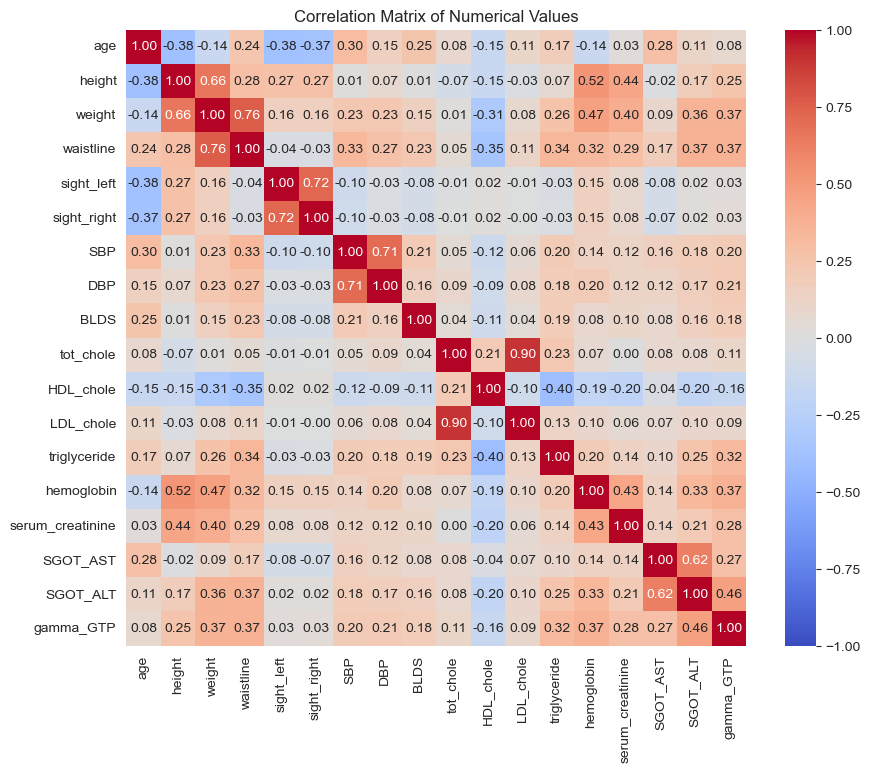

In [38]:
plt.figure(figsize=(10, 8))  # You can adjust the size of the plot as needed
correlation_matrix = data_quantitative.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Values')
plt.show()

In [39]:
class DataAnalysis:
    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):
            raise TypeError("Data must be a pandas DataFrame")
        self.data = data

    def univariate_analysis(self, column):
        print(f"Univariate Analysis for {column}:")
        data = self.data[column]

        if pd.api.types.is_numeric_dtype(data) and not pd.api.types.is_bool_dtype(data):
            # Summary statistics for numerical data
            summary_stats = data.describe()
            print("Summary Statistics:")
            print(summary_stats)

            # Distribution plot
            plt.figure(figsize=(10, 5))
            sns.histplot(data, kde=True)
            plt.title(f'Distribution of {column}')
            plt.show()

            # Box plot
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=data)
            plt.title(f'Box Plot of {column}')
            plt.show()
        else:
            # Summary statistics for categorical or boolean data
            value_counts = data.value_counts()
            print("Value Counts:")
            print(value_counts)

            # Bar plot
            plt.figure(figsize=(10, 5))
            sns.countplot(y=data, order = data.value_counts().index)
            plt.title(f'Bar Plot of {column}')
            plt.show()

        print("\n" + "-"*50 + "\n")

    def bivariate_analysis(self, column1, column2):
        print(f"Bivariate Analysis for {column1} and {column2}:")
        data1 = self.data[column1]
        data2 = self.data[column2]

        if pd.api.types.is_numeric_dtype(data1) and pd.api.types.is_numeric_dtype(data2) and not pd.api.types.is_bool_dtype(data1) and not pd.api.types.is_bool_dtype(data2):
            # Pearson correlation for numerical data
            correlation, p_value = pearsonr(data1, data2)
            print(f"Pearson Correlation: {correlation}, P-value: {p_value}")
            
        else:
            # ANOVA test for numerical vs categorical
            if pd.api.types.is_numeric_dtype(data1) and not pd.api.types.is_bool_dtype(data1):
                model = ols(f'{column1} ~ C({column2})', data=self.data).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                print("ANOVA Test Results:")
                print(anova_table)
            elif pd.api.types.is_numeric_dtype(data2) and not pd.api.types.is_bool_dtype(data2):
                model = ols(f'{column2} ~ C({column1})', data=self.data).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                print("ANOVA Test Results:")
                print(anova_table)

            # Chi-squared test for categorical vs categorical
            if (pd.api.types.is_categorical_dtype(data1) or pd.api.types.is_bool_dtype(data1)) and (pd.api.types.is_categorical_dtype(data2) or pd.api.types.is_bool_dtype(data2)):
                contingency_table = pd.crosstab(data1, data2)
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-squared Test Results: Chi2 = {chi2}, P-value = {p}, Degrees of Freedom = {dof}")

        print("\n" + "-"*50 + "\n")

    def full_analysis(self):
        columns = self.data.columns.tolist()

        if not columns:
            print("No columns found for analysis.")
            return

        # Univariate Analysis
        print("Performing Univariate Analysis...\n")
        for column in columns:
            self.univariate_analysis(column)

        # Bivariate Analysis
        print("Performing Bivariate Analysis...\n")
        for i in range(len(columns)):
            for j in range(i+1, len(columns)):
                self.bivariate_analysis(columns[i], columns[j])



Performing Univariate Analysis...

Univariate Analysis for sex:
Value Counts:
Female    375861
Male      300779
Name: sex, dtype: int64


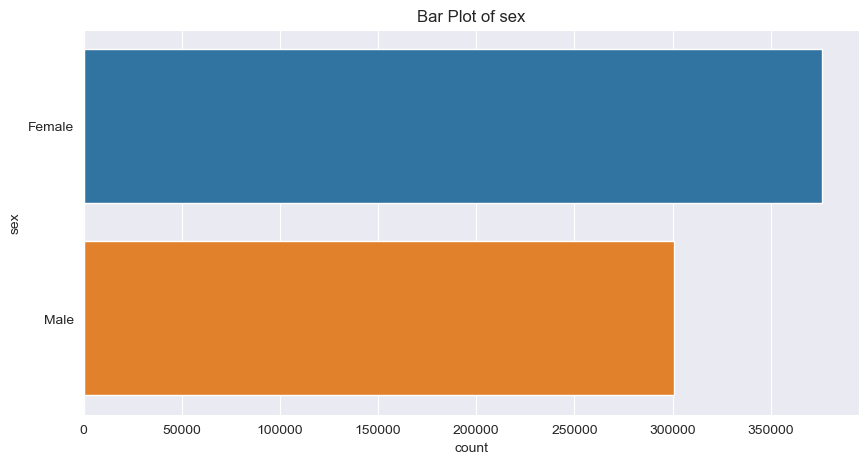


--------------------------------------------------

Univariate Analysis for age:
Summary Statistics:
count    676640.000000
mean         46.909812
std          14.451644
min          20.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64


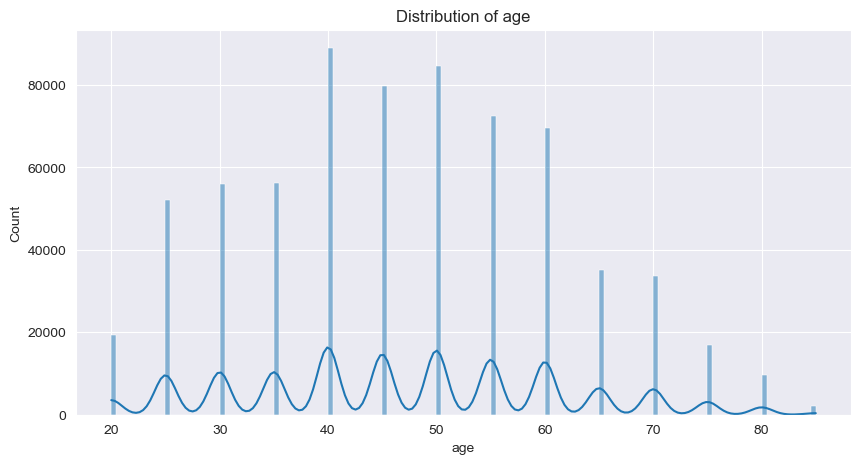

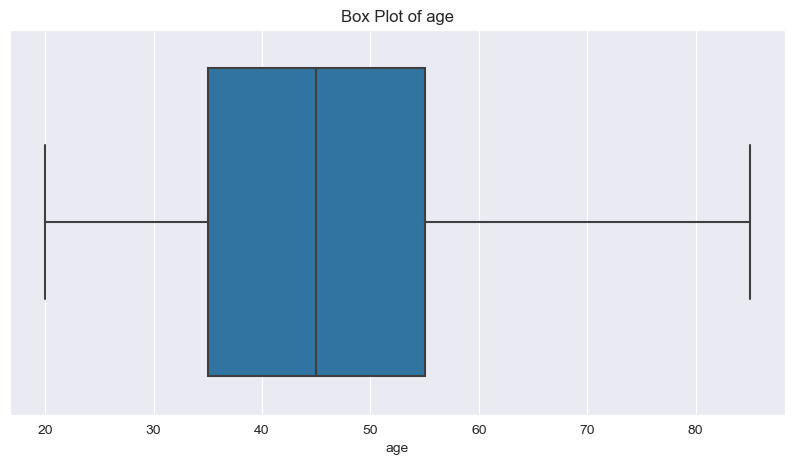


--------------------------------------------------

Univariate Analysis for height:
Summary Statistics:
count    676640.000000
mean        161.324848
std           9.171277
min         130.000000
25%         155.000000
50%         160.000000
75%         170.000000
max         190.000000
Name: height, dtype: float64


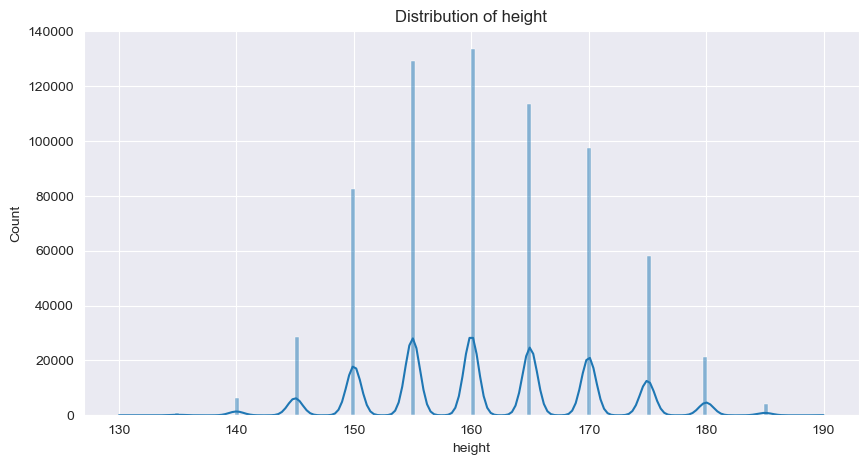

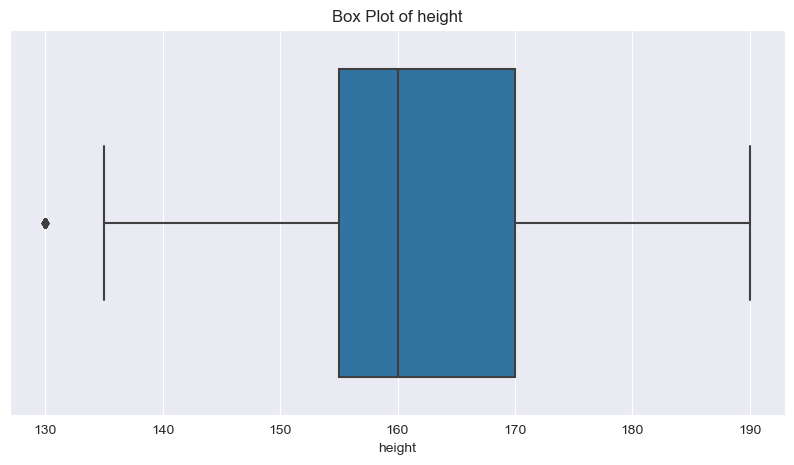


--------------------------------------------------

Univariate Analysis for weight:
Summary Statistics:
count    676640.000000
mean         60.783962
std          11.280093
min          25.000000
25%          50.000000
50%          60.000000
75%          70.000000
max         125.000000
Name: weight, dtype: float64


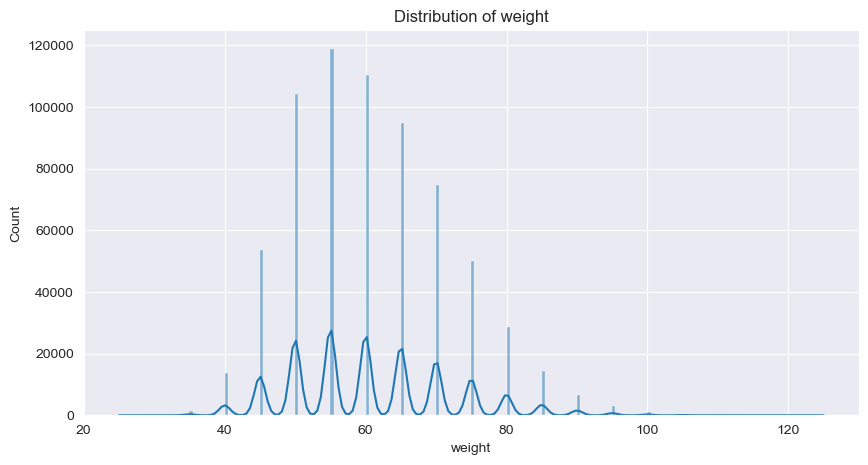

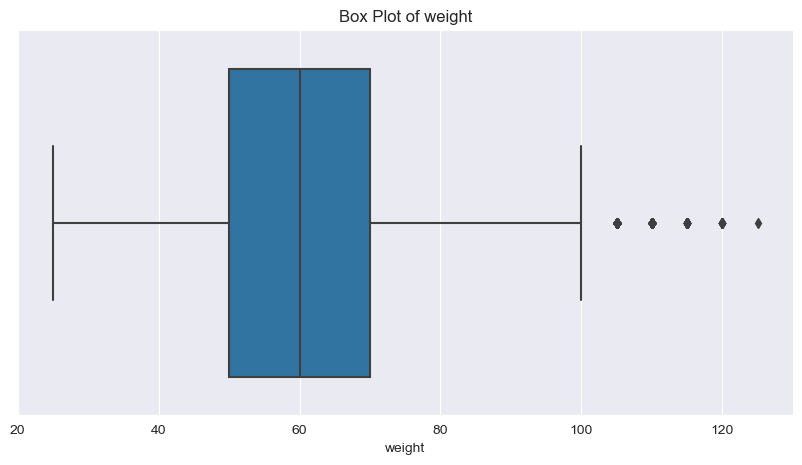


--------------------------------------------------

Univariate Analysis for waistline:
Summary Statistics:
count    676640.000000
mean         79.027399
std           8.972080
min          53.600000
25%          72.500000
50%          79.000000
75%          85.000000
max         108.300000
Name: waistline, dtype: float64


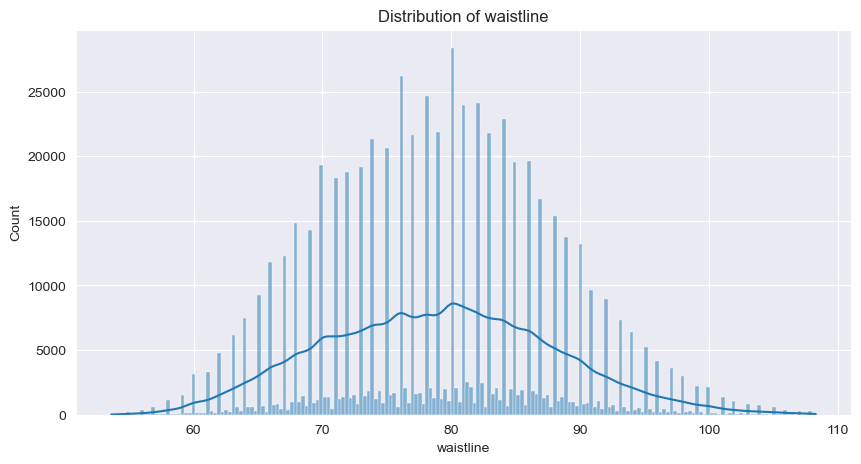

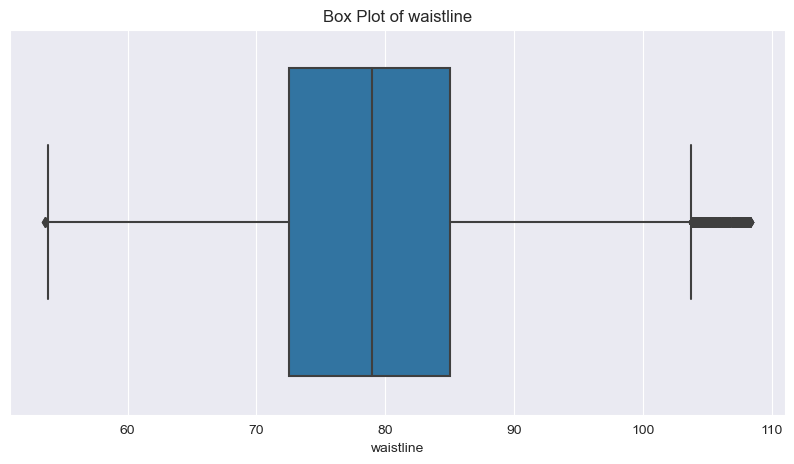


--------------------------------------------------

Univariate Analysis for sight_left:
Summary Statistics:
count    676640.000000
mean          0.944602
std           0.327507
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           1.900000
Name: sight_left, dtype: float64


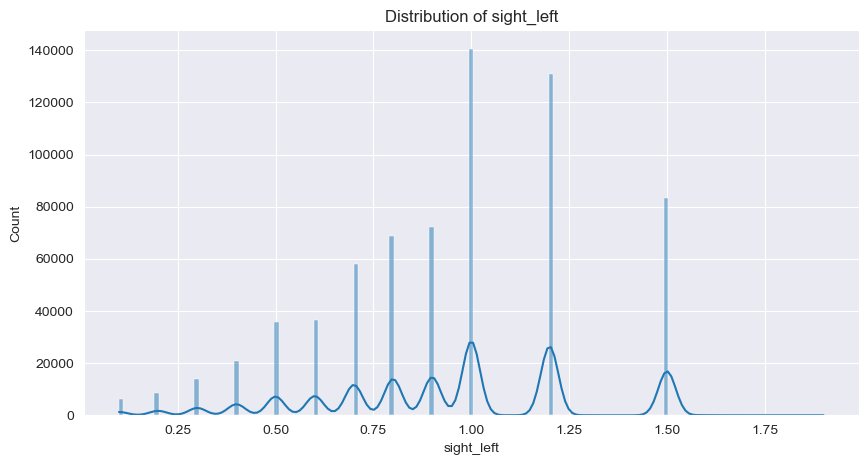

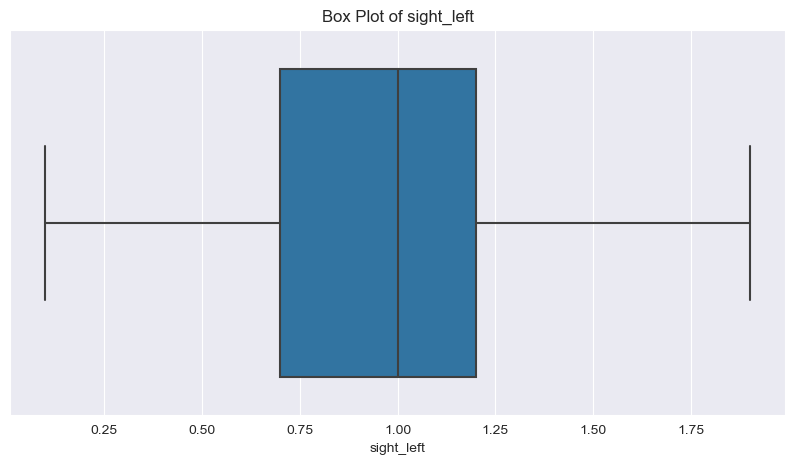


--------------------------------------------------

Univariate Analysis for sight_right:
Summary Statistics:
count    676640.000000
mean          0.942263
std           0.327287
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           1.900000
Name: sight_right, dtype: float64


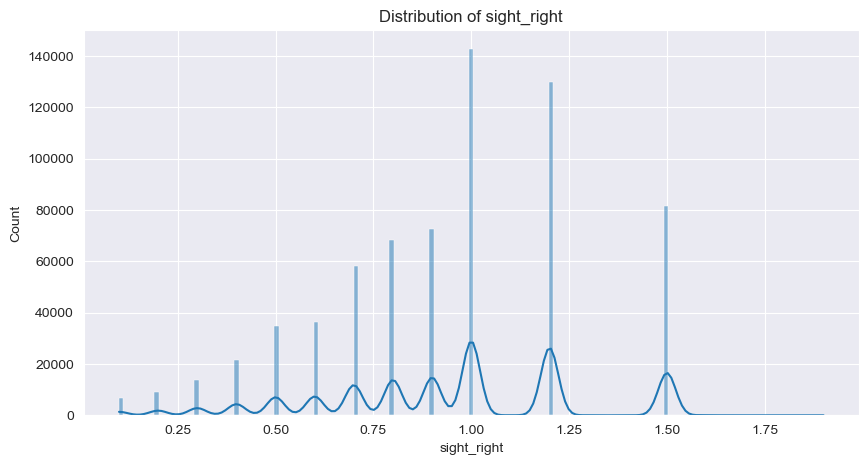

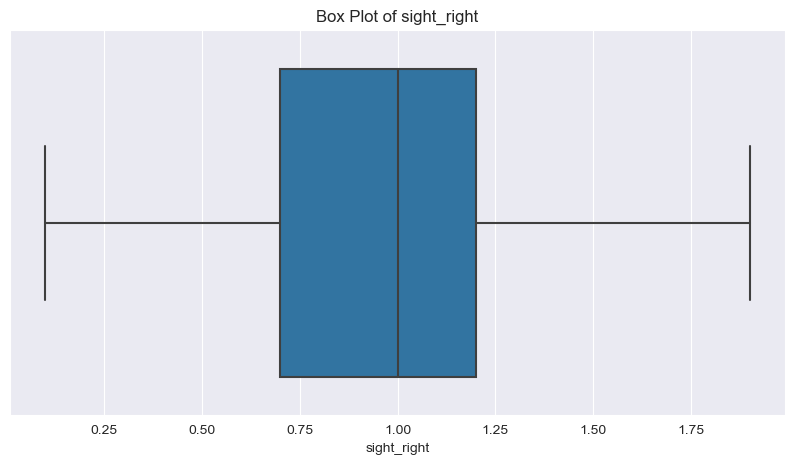


--------------------------------------------------

Univariate Analysis for hear_left:
Value Counts:
Normal      656677
Abnormal     19963
Name: hear_left, dtype: int64


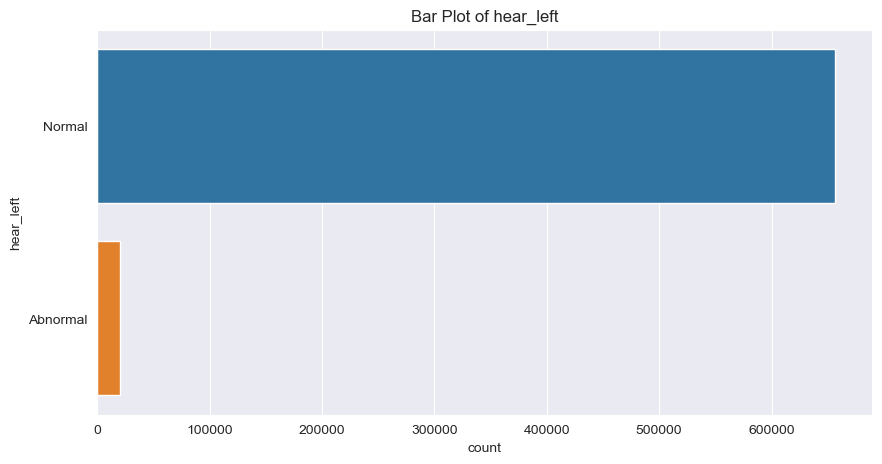


--------------------------------------------------

Univariate Analysis for hear_right:
Value Counts:
Normal      657341
Abnormal     19299
Name: hear_right, dtype: int64


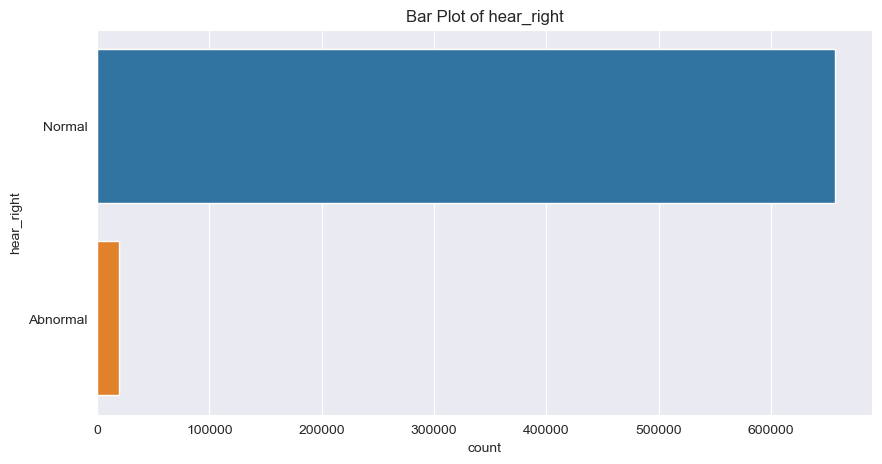


--------------------------------------------------

Univariate Analysis for SBP:
Summary Statistics:
count    676640.000000
mean        119.854057
std          12.957512
min          84.000000
25%         110.000000
50%         120.000000
75%         130.000000
max         159.000000
Name: SBP, dtype: float64


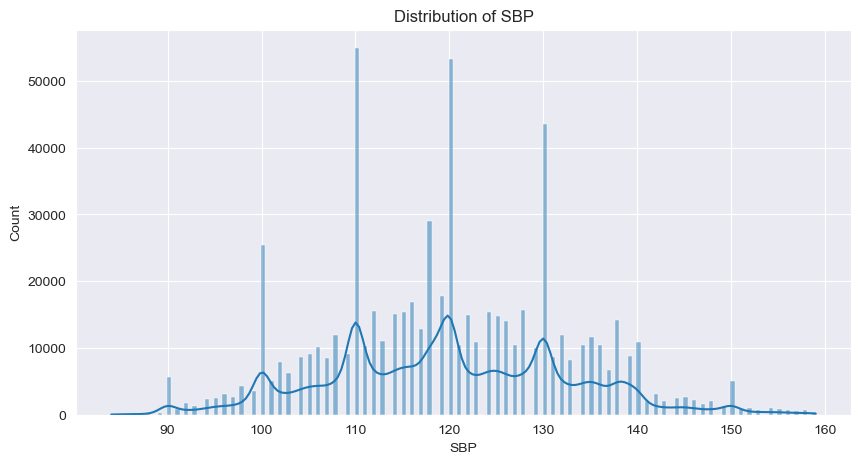

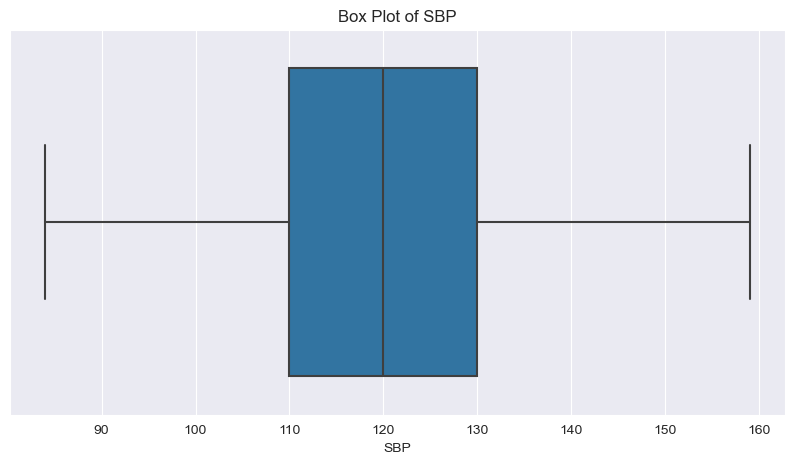


--------------------------------------------------

Univariate Analysis for DBP:
Summary Statistics:
count    676640.000000
mean         74.367257
std           8.642687
min          54.000000
25%          69.000000
50%          74.000000
75%          80.000000
max          97.000000
Name: DBP, dtype: float64


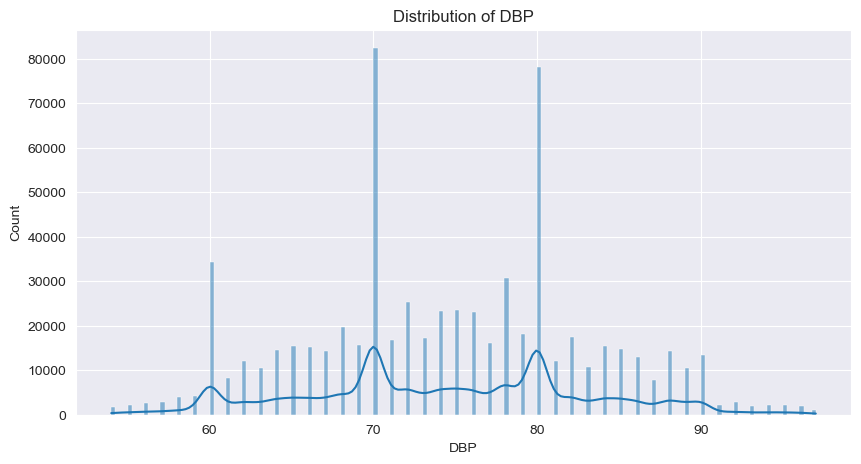

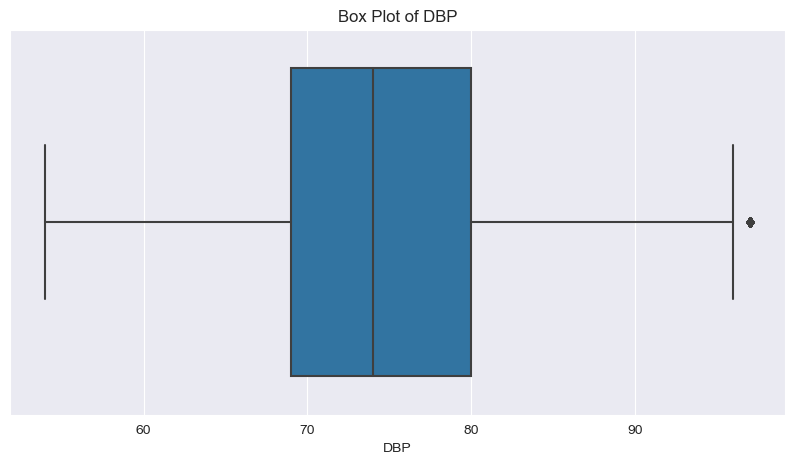


--------------------------------------------------

Univariate Analysis for BLDS:
Summary Statistics:
count    676640.000000
mean         94.720421
std          11.145631
min          63.000000
25%          87.000000
50%          94.000000
75%         101.000000
max         130.000000
Name: BLDS, dtype: float64


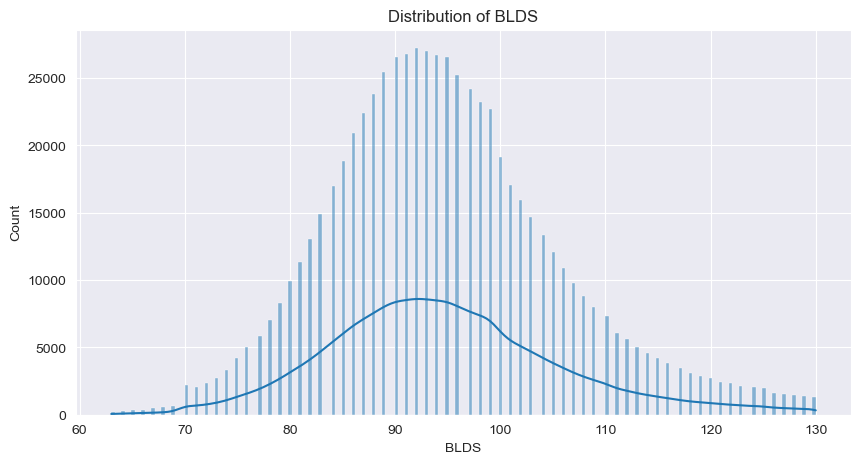

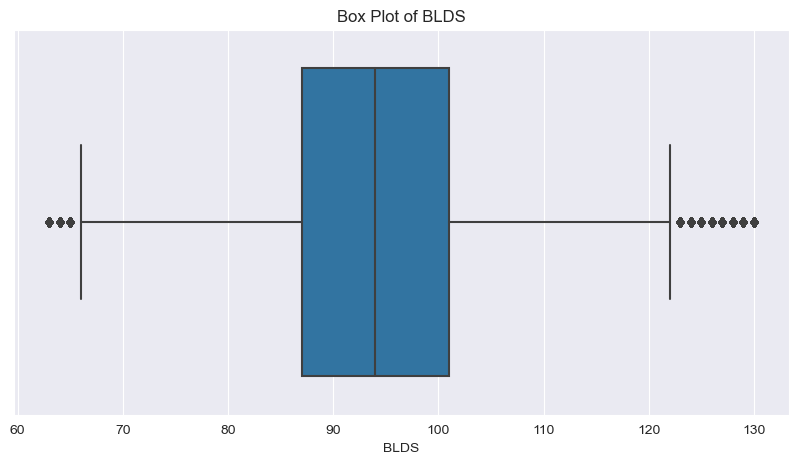


--------------------------------------------------

Univariate Analysis for tot_chole:
Summary Statistics:
count    676640.000000
mean        192.441532
std          34.252097
min          97.000000
25%         168.000000
50%         191.000000
75%         215.000000
max         292.000000
Name: tot_chole, dtype: float64


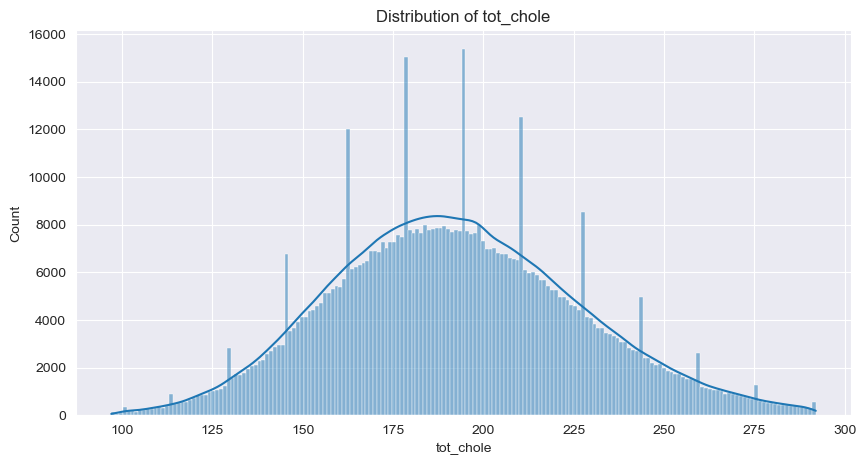

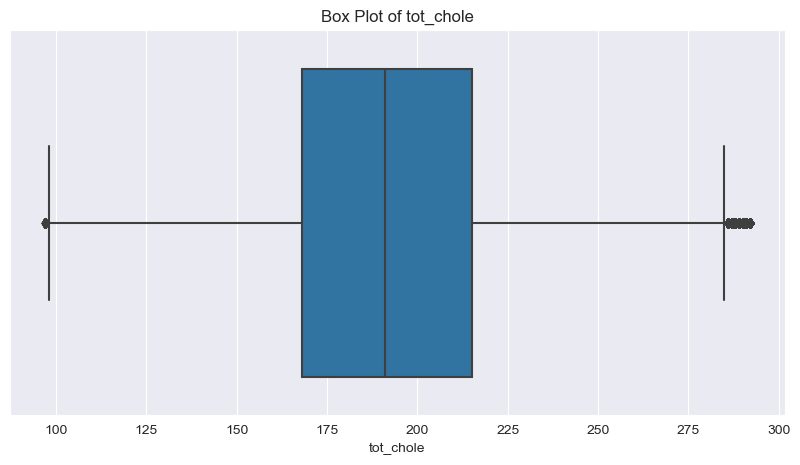


--------------------------------------------------

Univariate Analysis for HDL_chole:
Summary Statistics:
count    676640.000000
mean         58.757574
std          14.969352
min           1.000000
25%          48.000000
50%          57.000000
75%          67.000000
max         933.000000
Name: HDL_chole, dtype: float64


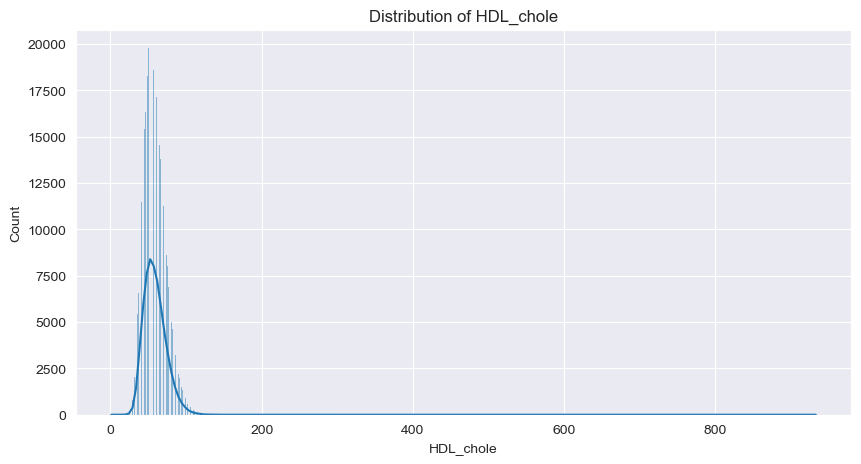

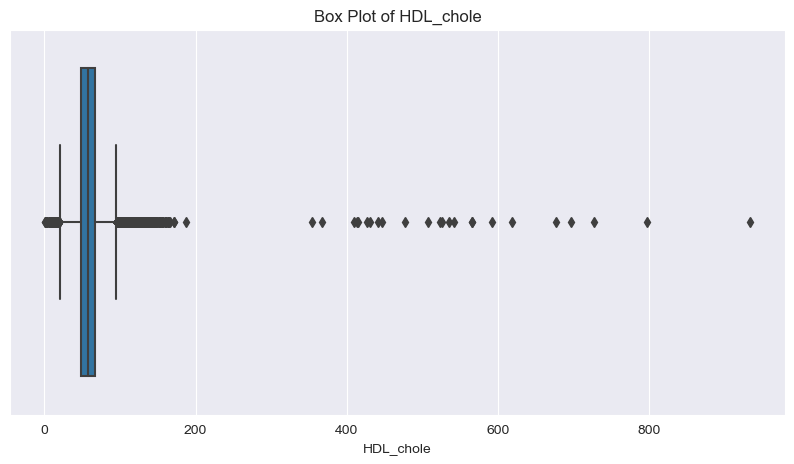


--------------------------------------------------

Univariate Analysis for LDL_chole:
Summary Statistics:
count    676640.000000
mean        112.625969
std          31.830992
min           1.000000
25%          90.000000
50%         111.000000
75%         133.000000
max        1750.000000
Name: LDL_chole, dtype: float64


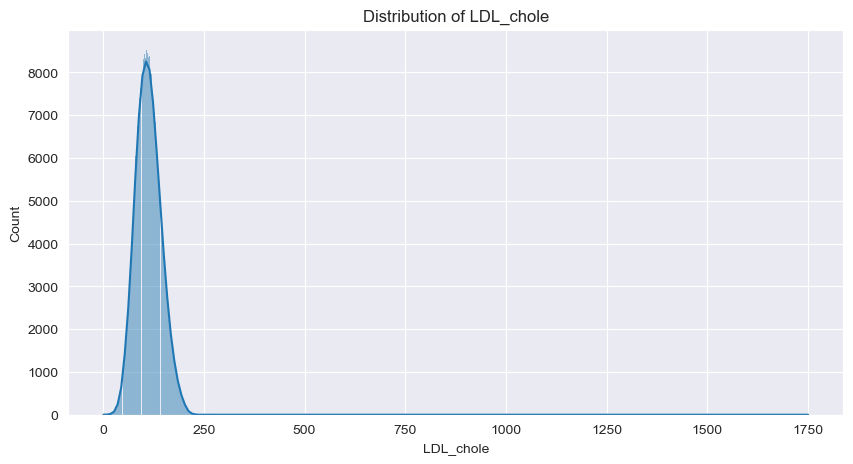

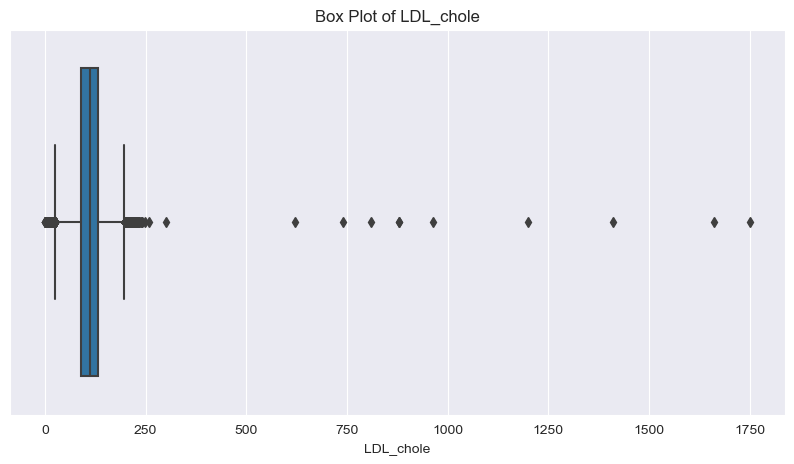


--------------------------------------------------

Univariate Analysis for triglyceride:
Summary Statistics:
count    676640.000000
mean        105.011083
std          50.361803
min           1.000000
25%          67.000000
50%          94.000000
75%         132.000000
max         272.000000
Name: triglyceride, dtype: float64


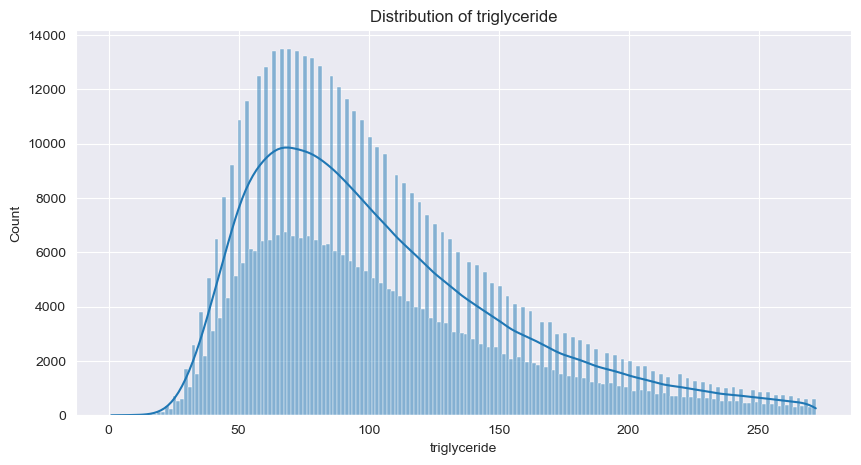

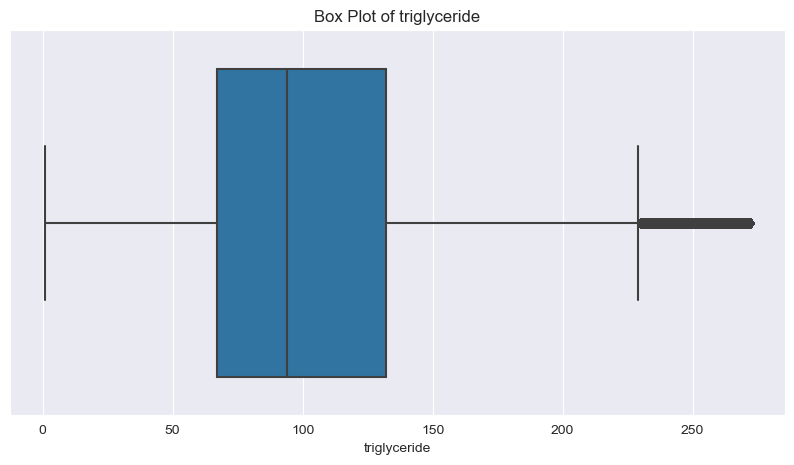


--------------------------------------------------

Univariate Analysis for hemoglobin:
Summary Statistics:
count    676640.000000
mean         13.968145
std           1.527744
min           1.000000
25%          13.000000
50%          13.900000
75%          15.100000
max          25.000000
Name: hemoglobin, dtype: float64


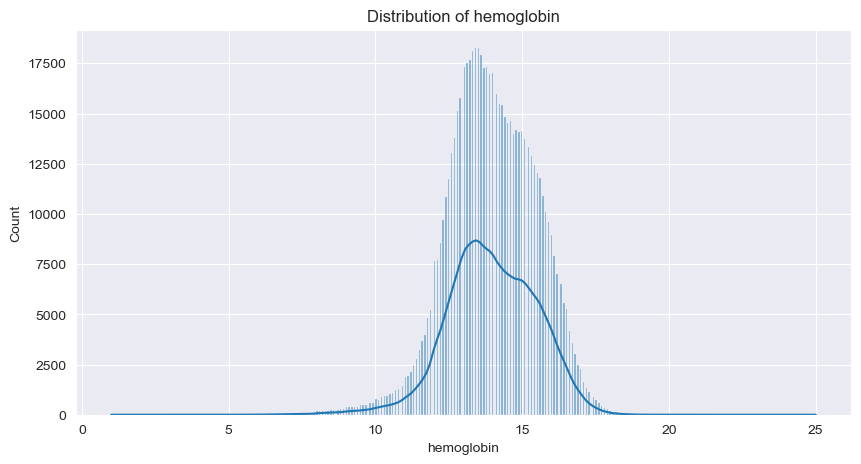

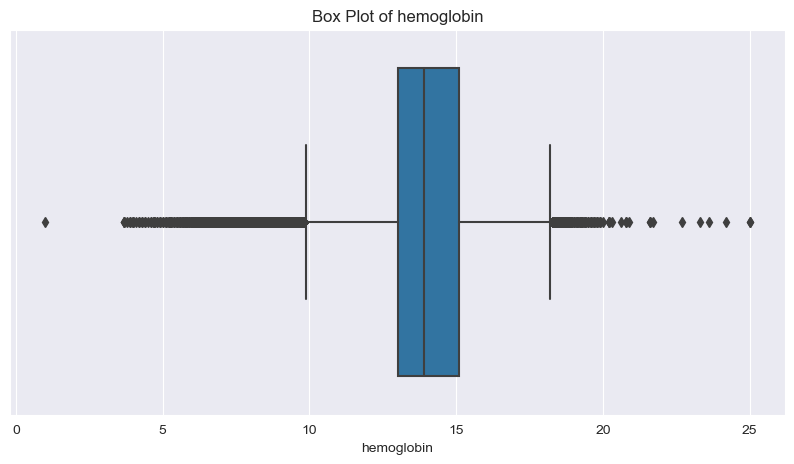


--------------------------------------------------

Univariate Analysis for urine_protein:
Value Counts:
-      645636
+/-     19336
+1       8378
+2       2556
+3        607
+4        127
Name: urine_protein, dtype: int64


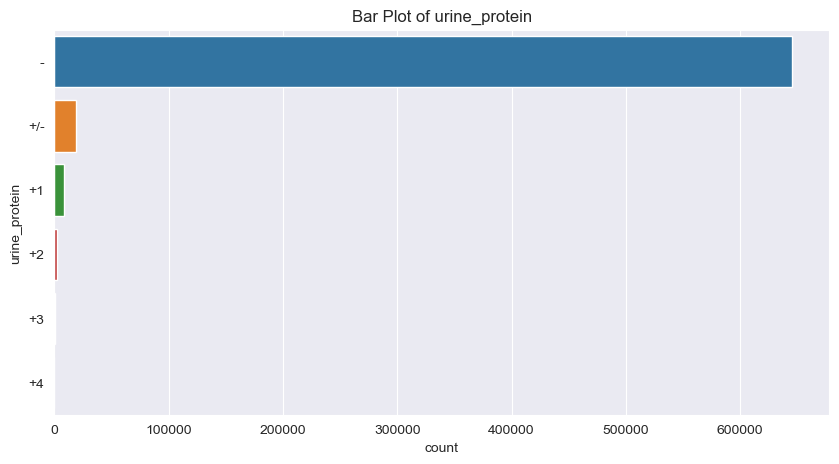


--------------------------------------------------

Univariate Analysis for serum_creatinine:
Summary Statistics:
count    676640.000000
mean          0.827368
std           0.188520
min           0.300000
25%           0.700000
50%           0.800000
75%           1.000000
max           1.400000
Name: serum_creatinine, dtype: float64


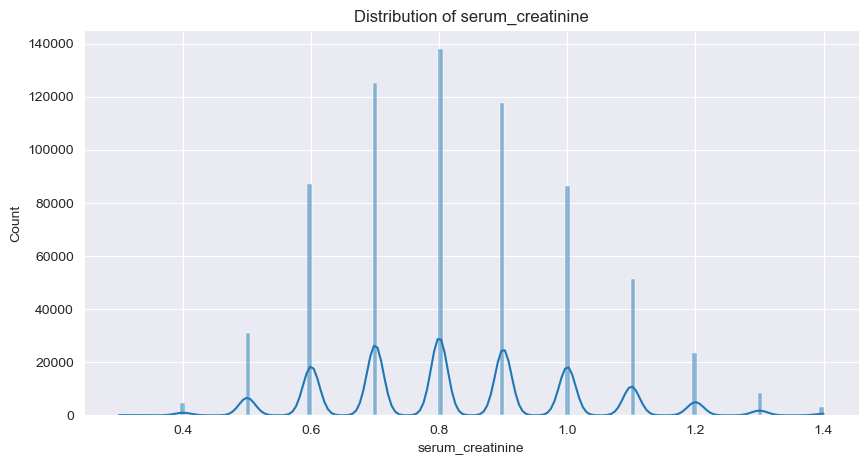

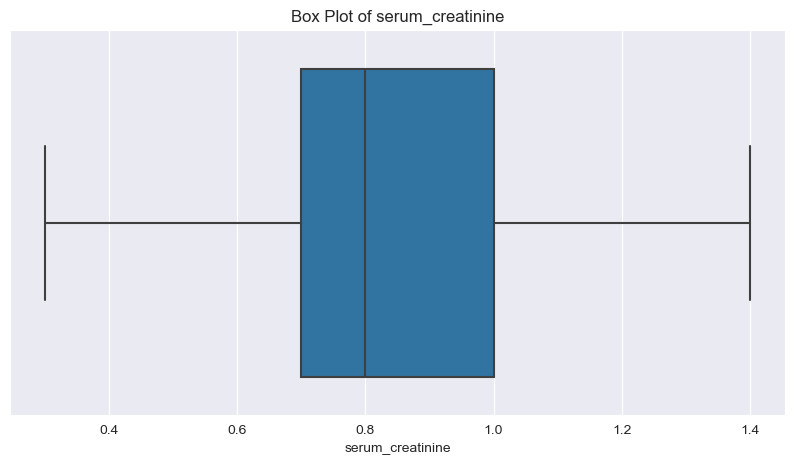


--------------------------------------------------

Univariate Analysis for SGOT_AST:
Summary Statistics:
count    676640.000000
mean         22.006661
std           5.596788
min           6.000000
25%          18.000000
50%          21.000000
75%          25.000000
max          41.000000
Name: SGOT_AST, dtype: float64


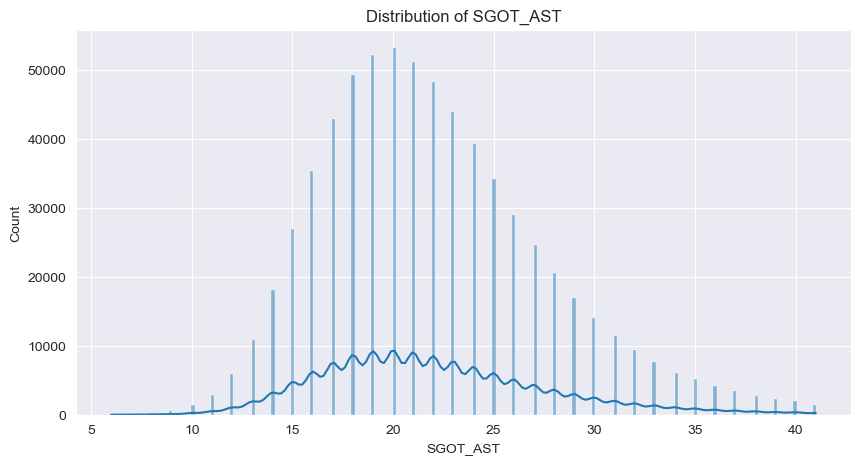

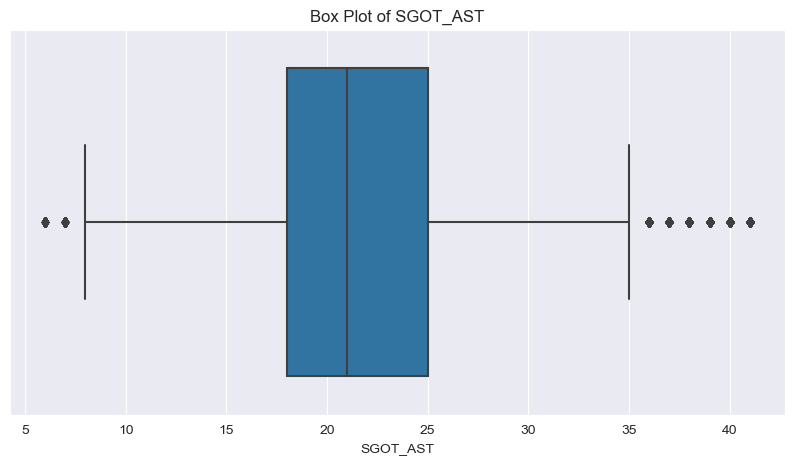


--------------------------------------------------

Univariate Analysis for SGOT_ALT:
Summary Statistics:
count    676640.000000
mean         19.127028
std           7.797039
min           1.000000
25%          13.000000
50%          18.000000
75%          23.000000
max          44.000000
Name: SGOT_ALT, dtype: float64


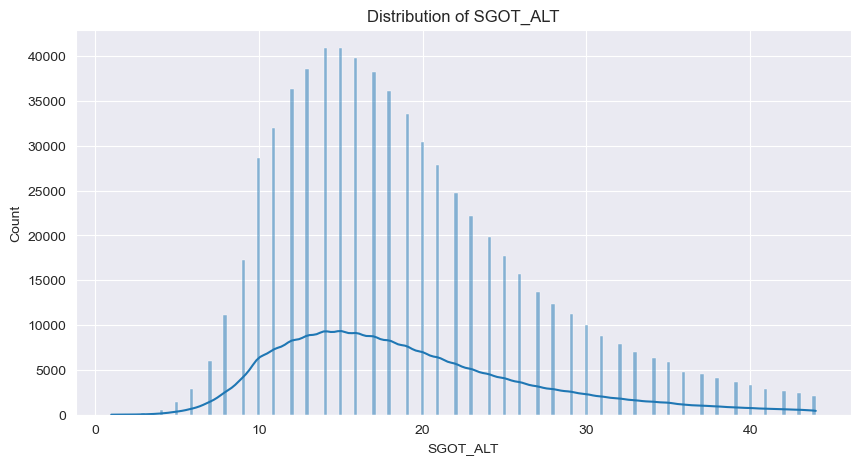

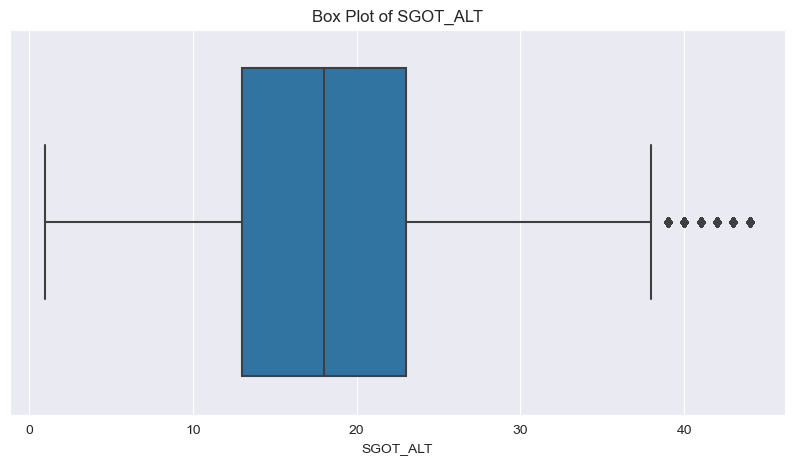


--------------------------------------------------

Univariate Analysis for gamma_GTP:
Summary Statistics:
count    676640.000000
mean         22.095453
std          10.720583
min           1.000000
25%          14.000000
50%          19.000000
75%          28.000000
max          56.000000
Name: gamma_GTP, dtype: float64


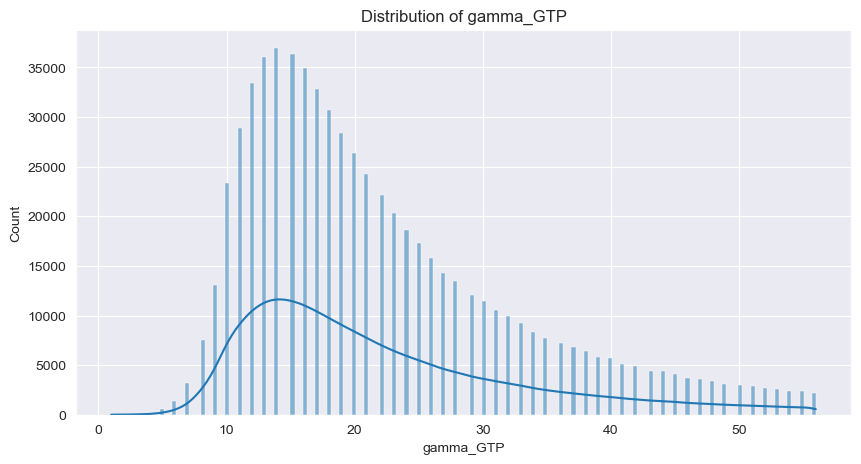

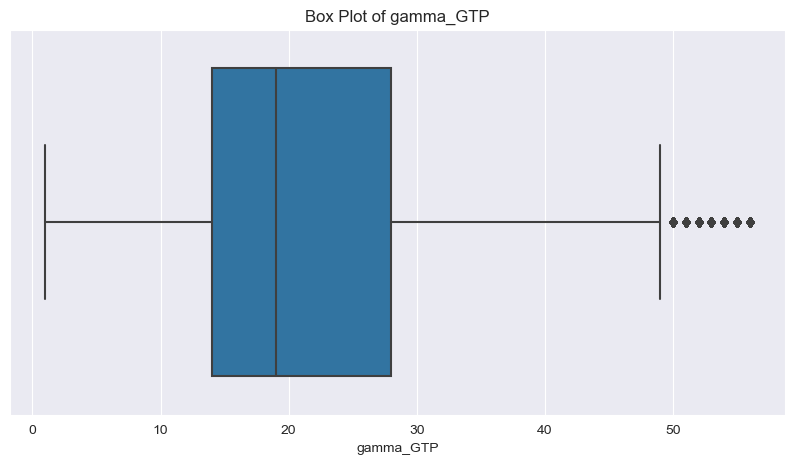


--------------------------------------------------

Univariate Analysis for DRK_YN:
Value Counts:
N    367301
Y    309339
Name: DRK_YN, dtype: int64


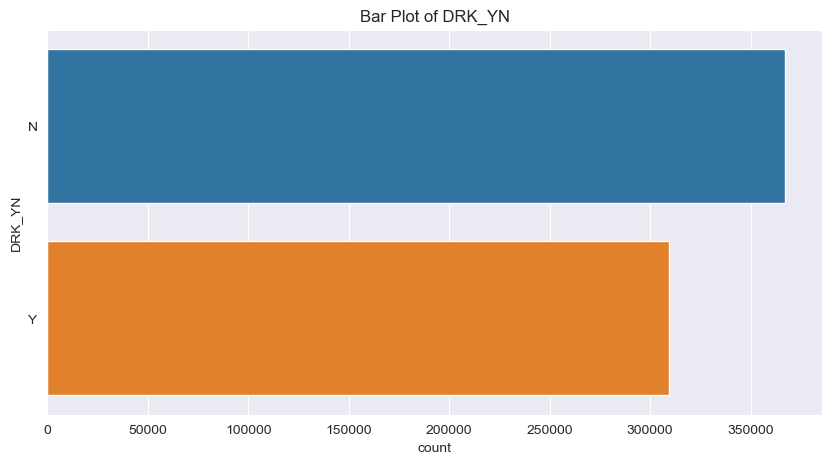


--------------------------------------------------

Performing Bivariate Analysis...

Bivariate Analysis for sex and age:
ANOVA Test Results:
                sum_sq        df            F  PR(>F)
C(sex)    4.560198e+05       1.0  2190.545412     0.0
Residual  1.408600e+08  676638.0          NaN     NaN

--------------------------------------------------

Bivariate Analysis for sex and height:
ANOVA Test Results:
                sum_sq        df              F  PR(>F)
C(sex)    2.925598e+07       1.0  715739.696677     0.0
Residual  2.765769e+07  676638.0            NaN     NaN

--------------------------------------------------

Bivariate Analysis for sex and weight:
ANOVA Test Results:
                sum_sq        df              F  PR(>F)
C(sex)    2.898500e+07       1.0  343408.258202     0.0
Residual  5.711089e+07  676638.0            NaN     NaN

--------------------------------------------------

Bivariate Analysis for sex and waistline:
ANOVA Test Results:
                sum_

In [40]:
# Example usage:
# Assume df is your pandas DataFrame
analysis = DataAnalysis(d_analysis)
analysis.full_analysis()

In [41]:
df_copy.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)

### Modeling with One Hot Encoding

In [42]:
import random
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, r2_score, mean_squared_error,classification_report
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

In [43]:
categ = df_copy.select_dtypes(include=["object", "category"]).columns.to_list()
num = df_copy.select_dtypes(exclude=["object", "category"]).columns.to_list()

num.remove('DRK_YN')
preprocessor = make_column_transformer(
        (OneHotEncoder(), categ),
        (StandardScaler(), num)
    )


Classifier Function

In [44]:
def evaluate_classifier_metrics(classifier, X_train, y_train, X_test, y_test):

    classifier.fit(X_train, y_train)

    test_predictions = classifier.predict(X_test)
    train_predictions = classifier.predict(X_train)
    print('Train Set Classification Results:')
    print(classification_report(y_train,train_predictions))
    print('\nTest Set Classification Results:')
    print(classification_report(y_test,test_predictions))

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X = df_copy.drop('DRK_YN',axis=1)
y = df_copy['DRK_YN'] 

X = preprocessor.fit_transform(X)
knn_classifier = KNeighborsClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
knn_metrics = evaluate_classifier_metrics(knn_classifier, X_train, y_train, X_test, y_test)

Logistic Regression

In [ ]:
logistic_classifier = LogisticRegression()
print("Logistic Regression Metrics:")
logistic_metrics = evaluate_classifier_metrics(logistic_classifier, X_train, y_train, X_test, y_test)


# PCA
---

In [ ]:
# if fanalysis is already installed, import it - else install and import it
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

# PCA Copy
---

In [ ]:
pca_copy = df_copy.copy()

# Create Variable Mappings
---

# Standard Scaling
---
- PCA works by identifying the directions (principal components) in which the data varies the most. If the features are on different scales, the features with higher magnitude (regardless of their actual variance in the data) will dominate the first principal components, potentially leading to misleading results. Standardizing ensures that all features contribute equally to the calculation of the principal components.
- PCA is sensitive to the mean of the data. By subtracting the mean of each feature from the data, standard scaling centers the data around the origin. This is important because PCA identifies the principal components using covariance or correlation, both of which are affected by the mean of the data.

In [ ]:
from sklearn.preprocessing import StandardScaler


quantitative_columns = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right','SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST','SGOT_ALT', 'gamma_GTP']
data_quantitative = pca_copy[quantitative_columns]

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_quantitative)

D = pd.DataFrame(data = data_standardized, columns = quantitative_columns)
# define dimensions of [X] matrix : number of variables
p = D.shape[1]

# define sample size of [X] : number of observations
n = D.shape[0]

# define values of matrix [X]
X = D.values

print(D.head())
# print dataset summary
print(D.info())

# Instantiate acp object form PCA class
---

In [ ]:
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

# run PCA on X observed data
acp.fit(X)

# print methods and attributes of acp object
dir(acp)

In [ ]:
acp.col_labels

In [ ]:
acp.row_labels

# Determine the number of factors
---

In [ ]:
# print eigenvalues (the lambdas) - output includes proportion of variance explained and cumulated values thereof
print(acp.eig_)

# row 1 : lambda 1, lambda 2, ..., lambda k
# IP is the sum of lambda
# row 2 : lambda 1 / IP, lambda 2 / IP, ..., lambda k/ IP
# Cumulative 

In [ ]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,p],[1,1],"r--",linewidth=1)

plt.show()

# Dimensionality Reduction from 18 to 6 using PCA

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction in data analysis and machine learning. It transforms the original variables to a new set of variables, the principal components, which are orthogonal (at right angles to each other), and which reflect the maximum variance in the data.

## The Kaiser-Guttman Rule

The Kaiser-Guttman rule is a popular criterion for selecting the number of principal components to retain in a PCA. According to this rule, we should only keep the components with eigenvalues greater than 1.

In our specific case, applying the Kaiser-Guttman rule suggests that we should retain 6 principal components.

## Importance of Reducing from 18 to 6 Dimensions

In conclusion, reducing the dimensionality of the dataset from 18 to 6 using PCA, guided by the Kaiser-Guttman rule, not only simplifies the dataset but also enhances the efficiency and performance of subsequent analyses and models, while potentially improving our understanding of the underlying patterns in the data.


In [ ]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [ ]:
print(f'\nExplained Variance by the first 6 components: {sum(acp.eig_[1][:6]):.2f} %')

In [ ]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

### Bartlett’s Test of Sphericity Results

#### Interpretation:
- **Bartlett’s Test Statistic:** 6,857,070.377
- This is a large value, indicating strong evidence against the null hypothesis.

- **P-value:** 0.000
- A p-value of 0.000 (which might be rounded and actually be a very small number, but not exactly zero) indicates that the probability of observing a test statistic as extreme as this, assuming the null hypothesis is true, is virtually zero.

#### Conclusion:
Since the p-value is extremely low, we reject the null hypothesis of Bartlett’s test of sphericity. This suggests that there is significant evidence in the data to indicate that the variables are correlated. This is a positive indication if you are planning to proceed with factor analysis or PCA, as these techniques assume that there are relationships between the variables that can be captured by underlying factors or principal components. In other words, the test result suggests that your data is likely suitable for these types of dimensionality reduction techniques.


# Variables Representation
---

In [ ]:
# Correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:6],index=D.columns, columns=['F1','F2','F3','F4','F5','F6']))

In [ ]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:6],index=D.columns, columns=['F1','F2','F3','F4','F5','F6']))

## Factor 1 (F1)
### High Loadings:
- Age
- Weight
- Waistline
- Hemoglobin
- Serum Creatinine
- SGOT_ALT
- Gamma_GTP

### Interpretation:
This factor might represent overall metabolic and aging processes, as it has high loadings on age, weight, and waistline (possibly indicating body size or obesity), as well as hemoglobin and serum creatinine (which are related to kidney function and blood). The liver enzymes (SGOT_ALT and gamma_GTP) also have high loadings, suggesting a possible link to liver function. This factor could be interpreted as a 'metabolic and aging' factor.

## Factor 2 (F2)
### High Loadings:
- Sight Left
- Sight Right
- Systolic Blood Pressure (SBP)
- Diastolic Blood Pressure (DBP)

### Interpretation:
This factor has high loadings on both left and right sight measurements, as well as systolic and diastolic blood pressure (SBP and DBP). This could indicate a factor related to cardiovascular and eye health, possibly capturing aspects of blood circulation and its effects on vision. This factor might be interpreted as a 'cardiovascular and vision' factor.

## Factor 3 (F3)
### High Loadings:
- Total Cholesterol (Tot_Chole)
- LDL Cholesterol (LDL_Chole)

### Interpretation:
This factor has high loadings on total cholesterol and LDL cholesterol, which are key indicators of lipid metabolism and cardiovascular health. This factor might represent lipid metabolism and cardiovascular risk, as higher levels of LDL cholesterol are typically associated with an increased risk of heart disease.

## Factor 4 (F4)
### High Loadings:
- Systolic Blood Pressure (SBP)
- Diastolic Blood Pressure (DBP)
- SGOT_AST (A Liver Enzyme)

### Interpretation:
This factor has high loadings on systolic and diastolic blood pressure, as well as SGOT_AST (a liver enzyme). The combination of high blood pressure and liver enzyme levels could indicate a factor related to cardiovascular and liver health, possibly capturing the effects of hypertension on the body, including potential impacts on liver function.

## Factor 5 (F5)
### High Loadings:
- HDL Cholesterol (HDL_Chole)
- Triglyceride
- SGOT_AST (A Liver Enzyme)

### Interpretation:
This factor has high loadings on HDL cholesterol (often considered “good” cholesterol), triglycerides, and SGOT_AST. This might represent a lipid and liver function factor, capturing aspects of lipid metabolism and its relationship with liver health. Higher levels of HDL cholesterol are generally considered protective against heart disease, while higher triglycerides can be a risk factor.

## Factor 6 (F6)
### High Loadings:
- Sight Left
- Sight Right
- HDL Cholesterol (HDL_Chole)

### Interpretation:
This factor has high loadings on both left and right sight measurements, as well as HDL cholesterol. This could indicate a factor related to vision and cardiovascular health, possibly capturing the relationship between good cholesterol levels and eye health.
